In [1]:
from classes_V3 import *

In [2]:
d = DC_IV('sample_4.1')

In [3]:
#d.draw_all_graphs()

In [2]:
d_2 = DC_IV('sample_4.1_2')

In [3]:
d_2.draw_all_graphs()

[None, Text(0.5, 1.0, 'sample 4.1, H10-50')]

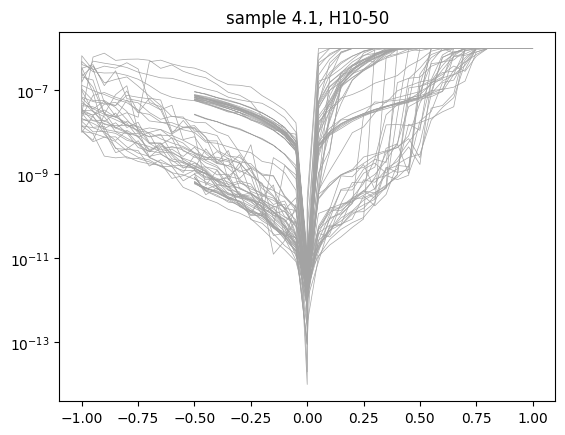

In [4]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('H10-50', ax, color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.1, H10-50')

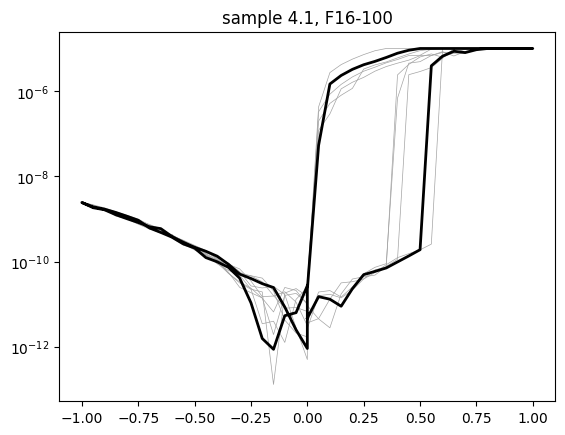

In [5]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('F16-100', ax, measurs=[2,3,4,5,10], color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.1, F16-100')
d.draw_single_line('F16-100', ax, 4, color = 'k', linewidth = 2)

Text(1.5, 1e-09, 'порядок измерения')

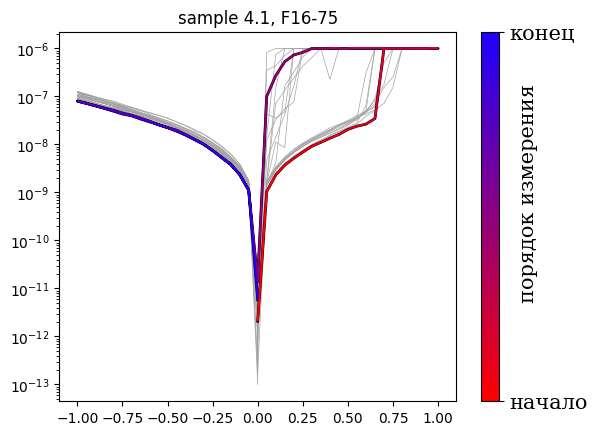

In [6]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('F16-75', ax, measurs=[i for i in range(25,35)], color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.1, F16-75')
line = d.draw_single_line('F16-75', ax, 40, color = 'k', linewidth = 2)
d.colorize_line(ax)
cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#ff0000', '#1e00ff'])
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['начало','конец'], size = 15, fontfamily = 'serif')
ax.text(x=1.5, y=10**(-9), s='порядок измерения', fontsize=15, rotation=90, ha = 'center', va = 'center', fontfamily = 'serif')

Text(1.5, 2e-07, 'порядок измерения')

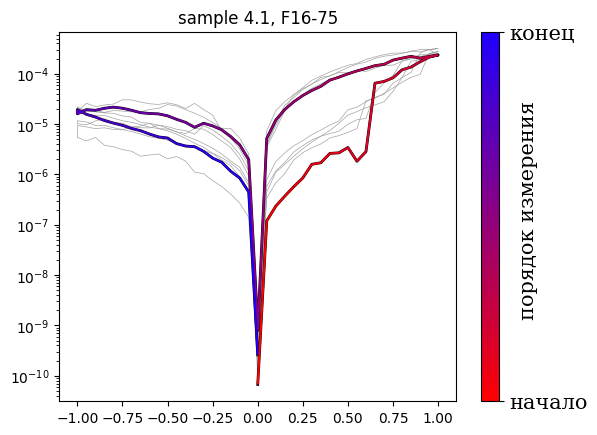

In [7]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('F16-75', ax, measurs=[i for i in range(56,63) if  i not in [61, 62]], color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.1, F16-75')
d.draw_single_line('F16-75', ax, 57, color = 'k', linewidth = 2)
d.colorize_line(ax)
cmap = LinearSegmentedColormap.from_list("custom_gradient", ['#ff0000', '#1e00ff'])
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['начало','конец'], size = 15, fontfamily = 'serif')
ax.text(x=1.5, y=2*10**(-7), s='порядок измерения', fontsize=15, rotation=90, ha = 'center', va = 'center', fontfamily = 'serif')

In [9]:
post_ann = pd.read_csv('post_ann.HIS', skiprows=7)
post_ann

,Time,Power,Setpoint,Pyro,TC1,TC2,TC3,Pyro_mV,Pressure,HighVacuum,N2,Ar,Unnamed: 12
0,0.000000,0.0,0,198,17,0,0,2007,990.4741,0,57,18,0
1,0.265625,0.0,0,198,17,0,0,2007,990.4741,0,57,18,0
2,0.531250,0.0,0,199,18,0,0,2016,992.6617,0,57,18,0
3,0.796875,0.0,0,199,18,0,0,2016,992.6617,0,57,18,0
4,1.062500,0.0,0,199,18,0,0,2016,992.0367,0,57,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,498.062500,0.0,7,254,18,0,0,2168,993.2868,0,57,300,0
1876,498.328100,0.0,4,268,18,0,0,2212,993.2868,0,56,299,0
1877,498.593800,0.0,4,268,18,0,0,2212,993.2868,0,56,299,0
1878,498.859400,0.0,1,255,18,0,0,2173,993.2868,0,57,299,0


(350.0, 500.0)

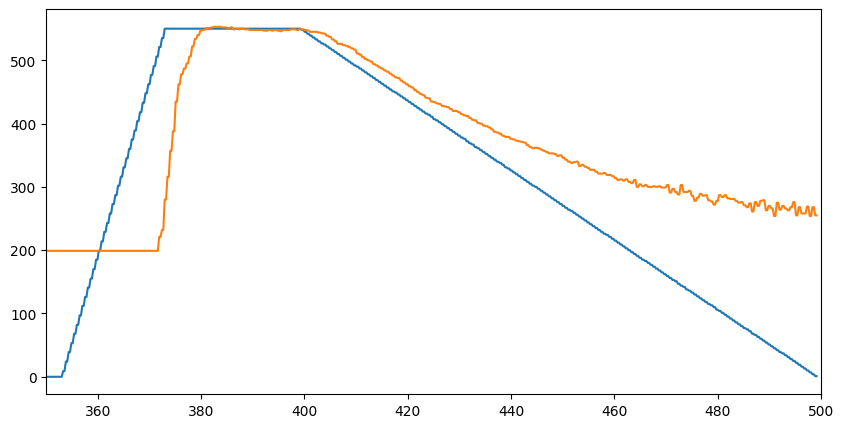

In [15]:
fig, ax = plt.subplots(figsize = [10,5])
ax.plot(post_ann['Time'], post_ann['Setpoint'])
ax.plot(post_ann['Time'], post_ann['Pyro'])
ax.set_xlim([350,500])